## Patent Recommendation System
## Implemented Proposal




In [ ]:
Part 1 

- In this interactive notebook, we will be implementing recommendation systems that offer personalized recommendations based on text inputs provided by the user. These recommendation systems will leverage the powerful language model from OpenAI, Ada-002, to analyze the text data and generate relevant suggestions.


 - Recommendation systems: Using OpenAI, we build recommendation systems that provide personalized recommendations based on texts (word set, title, or abstract) provided by the user.

 # Data Acquisition



A dataset of Patents is required for the recommendation system.

This should include for each Patent the Title and Abstract information. Other data can also be included to provide more information to help the user identify the Patents based on the presented suggestions.

- Such as Patent Number, Publication Date, CPC Classifications, or any other content.


## Data Collection Methods and Sources

* A dataset containing patents published between the period of 2022 and 2023 was extracted from the Lens.org platform. With the following considerations:

- It includes titles and abstracts.
- Patents with an active legal status.
- CPC classification focused on machine learning and artificial intelligence (G06 or G05B).
- And the 15,000 most relevant patents from this set.

[Lens](http://www.lens.og) is a powerful platform that facilitates the collection of data for research purposes. The process of data collection through Lens.org involves several steps. Firstly, Lens.org provides access to a vast amount of patent data from various patent offices around the world. Researchers can search and retrieve patent documents, including full-text publications.

To collect data through Lens.org, researchers can use the platform's search functionality, which allows them to enter specific criteria such as keywords, inventors, assignees, or patent numbers. The search results provide a comprehensive list of relevant patents that match the specified criteria.

# Embeddings

This is a proof-of-concept project that will also utilize the OpenAI's embeddings endpoint to generate embeddings for the text data. After merging the patent publications, we will use the OpenAI endpoint to generate high-quality vector representations for each text data point, which can be used for further analysis or machine learning tasks

In [ ]:
# installs
!pip install tiktoken
!pip install openai
!pip install gdown
!pip install openTSNE

# imports
import pandas as pd
import tiktoken
from openai.embeddings_utils import get_embedding
import matplotlib.pyplot as plt
import gdown
import pandas as pd
import numpy as np
from openai.embeddings_utils import get_embedding, cosine_similarity
import matplotlib.pyplot as plt
import matplotlib
from sklearn.manifold import TSNE
import openTSNE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 14.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 27.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import os

# Montar o Google Drive
drive.mount('/content/drive')

# Diretório do Google Drive
drive_path = "/content/drive/MyDrive"

# Caminho completo para a pasta de arquivos
### SUBSTITUIR "Nome da pasta" conforme alocação no Drive
folder_path = os.path.join(drive_path, "Nome da pasta", "Data")

# Lista de arquivos CSV na pasta
files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(".csv")]

# Exibir os caminhos dos arquivos CSV
for file in files:
    print(file)


Mounted at /content/drive
/content/drive/MyDrive/Trabalho_Topicos especiais/Data/PATENTES.csv


In [ ]:
# Read the downloaded CSV files into DataFrames
dataframes = [pd.read_csv(file_name, error_bad_lines=False) for file_name in files]

# Merge the DataFrames
merged_dataframe = pd.concat(dataframes, axis=0, ignore_index=True)

<ipython-input-9-b65791737394>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dataframes = [pd.read_csv(file_name, error_bad_lines=False) for file_name in files]


In [ ]:
# Filter some columns
columns = [0,3,4,5,6,10,11,12,13,15,16,17,19,20,23,24,25,26,31]
df_merged = merged_dataframe.iloc[:,columns]
df_merged.columns

Index(['Jurisdiction', 'Lens ID', 'Publication Date', 'Publication Year',
       'Application Number', 'Title', 'Abstract', 'Applicants', 'Inventors',
       'URL', 'Document Type', 'Has Full Text', 'Cited by Patent Count',
       'Simple Family Size', 'CPC Classifications', 'IPCR Classifications',
       'US Classifications', 'NPL Citation Count', 'Legal Status'],
      dtype='object')

In [ ]:
# Combine coluns Title and Abstract into a new colunm named "combined"
#df_merged["combined"] = "Title: " + df_merged.Title.str.strip() + "; Abstract: " + df_merged.Abstract.str.strip()

# Combine colunas Title and Abstract into a new coluna named "combined"
df_merged["combined"] = (
    "Title: " + df_merged.Title.fillna("").str.strip() +
    "; Abstract: " + df_merged.Abstract.fillna("").str.strip()
)

<ipython-input-15-33db9a56da3d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged["combined"] = (


In [ ]:
# embedding model parameters
embedding_model = "text-embedding-ada-002"
embedding_encoding = "cl100k_base"  # this the encoding for text-embedding-ada-002
max_tokens = 8191  # the maximum for text-embedding-ada-002 is 8191



In [ ]:
# Calc the number of token for each cell in column "combined"
encoding = tiktoken.get_encoding(embedding_encoding)

def count_tokens(text):
    if isinstance(text, str):
        return len(encoding.encode(text))
    else:
        return 0

df_merged["n_tokens"] = df_merged.combined.apply(count_tokens)

<ipython-input-17-c5cdce5accc8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged["n_tokens"] = df_merged.combined.apply(count_tokens)


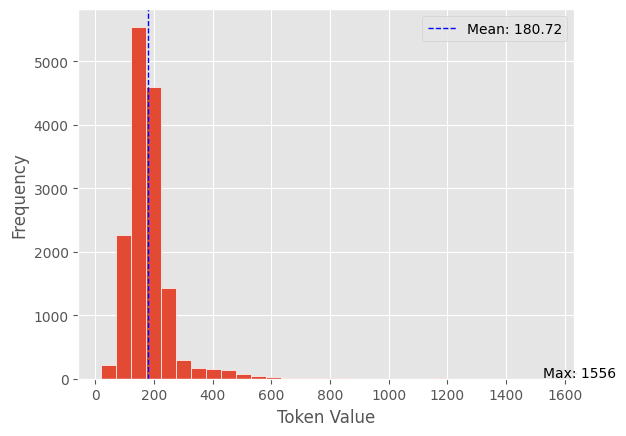

In [ ]:
# Set the style of the plot
plt.style.use('ggplot')

# Create the histogram using the 'Token' column
plt.hist(df_merged['n_tokens'], bins=30, edgecolor='white')

# Add labels for x and y axes
plt.xlabel('Token Value')
plt.ylabel('Frequency')

# Calculate the mean of the 'Token' column
mean_value = df_merged['n_tokens'].mean()

# Add a vertical line for the mean value
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')

# Find the maximum value of the x-axis
max_x_value = df_merged['n_tokens'].max()

# Add an arrow pointing to the maximum x value
plt.annotate(f'Max: {max_x_value}', xy=(max_x_value, 0), xycoords='data', xytext=(max_x_value - 30, 25),
             textcoords='data', arrowprops=dict(arrowstyle='->', lw=1.5), fontsize=10)

# Add the legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
print(f"Estimated priced U$ {(df_merged.n_tokens.sum()/1000*0.0004)}.")

Estimated priced U$ 1.0843120000000002.


## Request embeddings

**Attention**: It is absolutely crucial to safeguard your OpenAI key and share it exclusively with authorized individuals. Your key grants access to immensely powerful artificial intelligence tools, and if it falls into the wrong hands, it could be misused for malicious purposes. Please ensure that you take all necessary precautions to protect your OpenAI key, including refraining from sharing it with anyone who does not have explicit permission to access it. Remember, safeguarding your key is not only crucial for your own security but also for the overall well-being of the OpenAI community.

In [ ]:
# Open the file in read mode
with open("key_patente.txt", "r") as file:
    # Read the entire content of the file
    key = file.read()

In [ ]:
# Reference: https://platform.openai.com/docs/api-reference/authentication
# Import necessary libraries to interact with the OpenAI API
import os
import openai

# Set the OpenAI API key for authentication
openai.api_key = key

⚠️ **Attention:** 
>The following cell may take some time to run and could incur costs. Please be aware of this before running the cell.

In [ ]:
# verificando a coluna 'combined' criada com Título e Resumo das Patentes
combined_counts = df_merged["combined"].apply(type).value_counts()
print(df_merged["combined"])

0        Title: Contextualization of industrial data at...
1        Title: Failure prediction using gradient-based...
2        Title: Gaming service automation system with g...
3        Title: FAULT AWARE HYBRID NATURE INSPIRED ALGO...
4        Title: Augmented exception prognosis and manag...
                               ...                        
14995    Title: Model object management and storage sys...
14996    Title: SYSTEM AND METHOD FOR MISSION CRITICAL ...
14997    Title: METHOD FOR GENERATING AUTOMATICALLY OF ...
14998    Title: Projecting images to a generative model...
14999    Title: Method and system for tracking an objec...
Name: combined, Length: 15000, dtype: object


In [ ]:
# verificando quantas linhas da coluna 'combinefloat e quantas são str 
# (código abaixo está dando erro, pois deve ser usado apenas para str ) 
float_count = df_merged["combined"].apply(lambda x: isinstance(x, float)).sum()
string_count = df_merged["combined"].apply(lambda x: isinstance(x, str)).sum()

print(float_count)
print(string_count)



0
15000


In [ ]:
float_values = df_merged.loc[df_merged['combined'].apply(lambda x: isinstance(x, float)), 'combined']
print(float_values)


Series([], Name: combined, dtype: object)


In [ ]:
# Take this cell will cost U$ 1,00 to run
# Ensure you have your API key set in your environment per the README: https://github.com/openai/openai-python#usage
# This may take a lot of minutes (1h)

df_merged["embedding"] = df_merged.combined.apply(lambda x: get_embedding(x, engine=embedding_model))


<ipython-input-31-6b08481776ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged["embedding"] = df_merged.combined.apply(lambda x: get_embedding(x, engine=embedding_model))


In [ ]:
print(df_merged)

       Jurisdiction              Lens ID Publication Date  Publication Year  \
0                 1  032-901-408-393-16X       2022-09-06              2022   
1                 2  034-650-607-278-059       2023-03-14              2023   
2                 3  048-517-780-421-299       2022-12-20              2022   
3                 4  056-613-732-378-521       2022-04-28              2022   
4                 5  070-568-837-620-481       2022-02-22              2022   
...             ...                  ...              ...               ...   
14995         14996  097-906-128-627-161       2022-12-13              2022   
14996         14997  098-646-067-722-445       2022-05-26              2022   
14997         14998  103-239-993-627-069       2022-08-17              2022   
14998         14999  096-662-198-747-009       2022-10-11              2022   
14999         15000  096-863-533-730-468       2022-07-05              2022   

      Application Number                           

In [ ]:
# Export the output into a .csv file

df_merged.to_csv("Patentes.csv",index=False)